In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mastercard-stock-data-latest-and-updated/Mastercard_stock_info.csv
/kaggle/input/mastercard-stock-data-latest-and-updated/Mastercard_stock_history.csv


 Step 1 - Importing Libraries

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

#To read stock data
from pandas_datareader.data import DataReader

#For time stamps
from datetime import datetime
from math import sqrt


Step 2 Importing dataset From Location

In [3]:
mc = pd.read_csv('../input/mastercard-stock-data-latest-and-updated/Mastercard_stock_history.csv')
print(mc.head())

         Date      Open      High       Low     Close     Volume  Dividends  \
0  2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000        0.0   
1  2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000        0.0   
2  2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000        0.0   
3  2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000        0.0   
4  2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


Step 3 - Building simple Plot of Price vs volume plot of MasterCard using pandas

<AxesSubplot:>

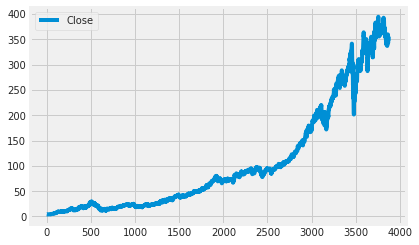

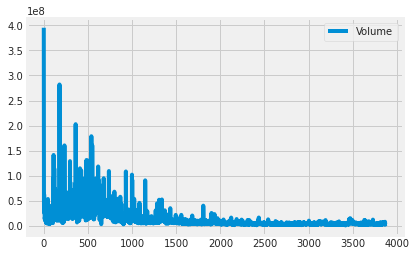

In [4]:
#Closing Price PLot
mc[["Close"]].plot()
#Volume Plot
mc[["Volume"]].plot()

Step 4 - Building a open high low close plot using Plotly 

In [5]:
#OHLC Plot using Plotly
import plotly.graph_objects as go

fig = go.Figure(data=go.Ohlc(x = mc['Date'],
        open = mc['Open'],
        high = mc['High'],
        low = mc['Low'],
        close = mc['Close']))
fig.show()

Step 5 - Reset the Index To date Column

In [6]:
mc.set_index('Date')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.00,0.0
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.00,0.0
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.00,0.0
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.00,0.0
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.00,0.0
...,...,...,...,...,...,...,...
2021-10-05,347.121403,348.130138,342.497241,342.776886,4724100,0.00,0.0
2021-10-06,339.580960,348.439763,338.682072,348.250000,3712000,0.00,0.0
2021-10-07,349.000000,357.899994,349.000000,353.910004,3209200,0.44,0.0


Step 6 - Daily percentage change in price of the stock

In [7]:
mc['daily_change_per'] = mc['Close'].pct_change()*100
mc['returns'] = mc['daily_change_per'] / mc['Close']
mc.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_change_per,returns
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0,NaN,NaN
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0,-2.326065,-0.556517
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0,-2.069906,-0.505698
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0,2.136338,0.511011
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0,5.718738,1.293924
5,2006-06-02,4.511782,4.530387,4.352707,4.371312,37253000,0.0,0.0,-1.094516,-0.250386
6,2006-06-05,4.376895,4.581554,4.372244,4.572251,37188000,0.0,0.0,4.596759,1.005360
7,2006-06-06,4.649463,4.709930,4.446665,4.493178,49045000,0.0,0.0,-1.729399,-0.384894
8,2006-06-07,4.495968,4.502480,4.348986,4.428059,25013000,0.0,0.0,-1.449302,-0.327300
9,2006-06-08,4.428061,4.439224,4.232706,4.439224,34439000,0.0,0.0,0.252156,0.056802


Step 7 Creating a histogram for the above values change

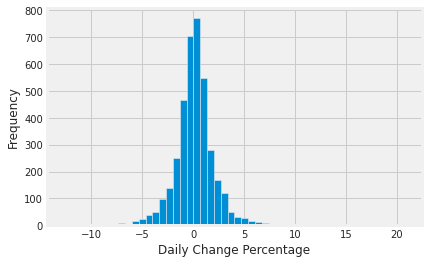

count    3871.000000
mean        0.136961
std         2.170095
min       -12.725478
25%        -0.818595
50%         0.133341
75%         1.024576
max        20.846303
Name: daily_change_per, dtype: float64

In [8]:
mc['daily_change_per'].fillna(0)
mc['daily_change_per'].hist(bins = 50)
plt.xlabel('Daily Change Percentage')
plt.ylabel('Frequency')
plt.show()

#print the statistics on daily change percentage
mc.daily_change_per.describe()

Step 8 - In this we are creating a row with an aim to create a trend function 

In [9]:
def daily_trend(x):
    if x > -0.5 and x <= 0.5:
        return 'No change'
    elif x > 0.5 and x <= 2:
        return 'Upto 2% Increase'
    elif x > -2 and x <= -0.5:
        return 'Upto 2% Decrease'
    elif x > 2 and x <= 5:
        return '2-5% Increase'
    elif x > -5 and x <= -2:
        return '2-5% Decrease'
    elif x > 5 and x <= 10:
        return '5-10% Increase'
    elif x > -10 and x <= -5:
        return '5-10% Decrease'
    elif x > 10:
        return '>10% Increase'
    elif x <= -10:
        return '>10% Decrease'


Applying This trend function

In [10]:
mc['Trend']= np.zeros(mc['daily_change_per'].count()+1)
mc['Trend']= mc['daily_change_per'].apply(lambda x:daily_trend(x))
mc['Trend'].replace('None','No change')
mc.head(20)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_change_per,returns,Trend
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0,NaN,NaN,None
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0,-2.326065,-0.556517,2-5% Decrease
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0,-2.069906,-0.505698,2-5% Decrease
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0,2.136338,0.511011,2-5% Increase
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0,5.718738,1.293924,5-10% Increase
5,2006-06-02,4.511782,4.530387,4.352707,4.371312,37253000,0.0,0.0,-1.094516,-0.250386,Upto 2% Decrease
6,2006-06-05,4.376895,4.581554,4.372244,4.572251,37188000,0.0,0.0,4.596759,1.005360,2-5% Increase
7,2006-06-06,4.649463,4.709930,4.446665,4.493178,49045000,0.0,0.0,-1.729399,-0.384894,Upto 2% Decrease
8,2006-06-07,4.495968,4.502480,4.348986,4.428059,25013000,0.0,0.0,-1.449302,-0.327300,Upto 2% Decrease
9,2006-06-08,4.428061,4.439224,4.232706,4.439224,34439000,0.0,0.0,0.252156,0.056802,No change


Step 9 - Plotting the trend

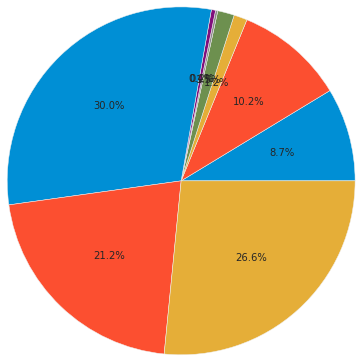

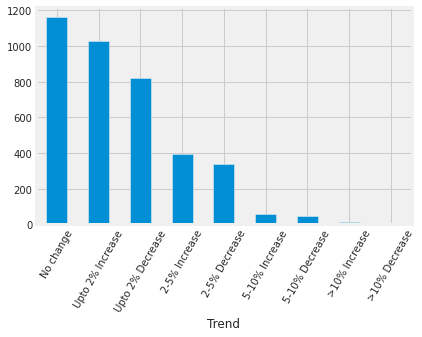

In [11]:
mc_pie_data = mc.groupby('Trend')

pie_label = mc_pie_data['Trend'].unique()
plt.pie(mc_pie_data['Trend'].count(),  
        autopct = '%1.1f%%', radius = 2 )

plt.show()

ax=mc_pie_data['Trend'].count().sort_values(ascending = False).plot.bar(rot = 60)
plt.show()

Lets Do Some Forecasting

Step 10 - Histogram of daily price change of 'Close Price'

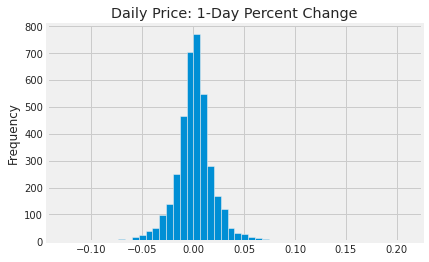

In [12]:
# Histogram of the daily price change percent of 'Close' price
mc['Close'].pct_change().plot.hist(bins=50)
plt.title('Daily Price: 1-Day Percent Change')
plt.show()

 Step 11- Create 10-day % changes of Last for the current day, and 10 days in the future and calculating it's correlation

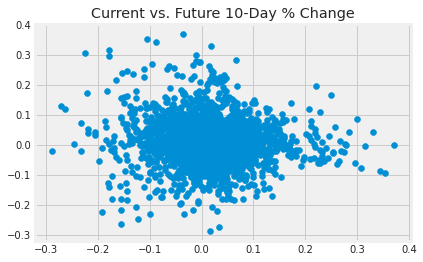

In [13]:
mc['10d_future_close'] = mc['Close'].shift(-10)
mc['10d_close_future_pct'] = mc['10d_future_close'].pct_change(10)
mc['10d_close_pct'] = mc['Close'].pct_change(10)


# Calculate the correlation matrix between the 10d close pecentage changes (current and future)
corr = mc[['10d_close_pct', '10d_close_future_pct']].corr()

# Scatter the current 10-day percent change vs the future 10-day percent change
plt.scatter(mc['10d_close_pct'], mc['10d_close_future_pct'])
plt.title('Current vs. Future 10-Day % Change')
plt.show()

In [14]:
# a list of the feature names for later
feature_names = ['10d_close_pct']  

In [15]:
# Drop all na values
mc = mc.dropna()

# Create features and targets
# use feature_names for features; 5d_close_future_pct for targets
features = mc[feature_names]
targets = mc['10d_close_future_pct']

# Create DataFrame from target column and feature columns
feat_targ_df = mc[['10d_close_future_pct'] + feature_names]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                      10d_close_future_pct  10d_close_pct
10d_close_future_pct              1.000000      -0.091581
10d_close_pct                    -0.091581       1.000000


Plotting Heatmap for correlation via Seaborn Library

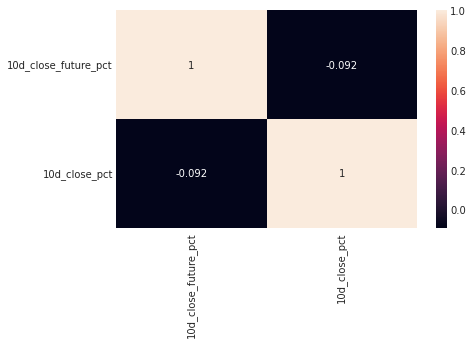

In [16]:
import seaborn as sns
# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90) # fix ticklabel directions
plt.show() # show the plot